In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

pd.set_option('display.max_columns', None)

In [66]:
employeeData = "../data/Employee-Attrition.csv"

df = pd.read_csv(employeeData)

In [67]:
df.shape

(1470, 35)

In [68]:
## df.head()
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1327,46,No,Travel_Rarely,1319,Sales,3,3,Technical Degree,1,1863,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,Y,No,12,3,4,80,1,25,5,3,19,17,2,8
1113,32,No,Non-Travel,1200,Research & Development,1,4,Technical Degree,1,1574,4,Male,62,3,2,Research Scientist,1,Married,4087,25174,4,Y,No,14,3,2,80,1,9,3,2,6,5,1,2
573,26,Yes,Travel_Rarely,1146,Sales,8,3,Technical Degree,1,796,4,Male,38,2,2,Sales Executive,1,Single,5326,3064,6,Y,No,17,3,3,80,0,6,2,2,4,3,1,2
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2
125,26,No,Travel_Rarely,841,Research & Development,6,3,Other,1,164,3,Female,46,2,1,Research Scientist,2,Married,2368,23300,1,Y,No,19,3,3,80,0,5,3,2,5,4,4,3
871,24,Yes,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,1219,4,Female,97,3,1,Laboratory Technician,2,Married,2210,3372,1,Y,No,13,3,1,80,1,1,3,1,1,0,0,0
307,38,No,Travel_Rarely,849,Research & Development,25,2,Life Sciences,1,421,1,Female,81,2,3,Research Director,2,Married,12061,26707,3,Y,No,17,3,3,80,1,19,2,3,10,8,0,1
715,33,No,Travel_Frequently,827,Research & Development,1,4,Other,1,998,3,Female,84,4,2,Healthcare Representative,2,Married,5488,20161,1,Y,Yes,13,3,1,80,1,6,2,3,6,5,1,2
1048,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,4,Male,81,1,2,Sales Executive,1,Single,4759,15891,3,Y,No,18,3,4,80,0,15,2,3,13,9,3,12
1265,33,No,Non-Travel,775,Research & Development,4,3,Technical Degree,1,1771,4,Male,90,3,2,Research Scientist,2,Divorced,3055,6194,5,Y,No,15,3,4,80,2,11,2,2,9,8,1,7


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [70]:
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

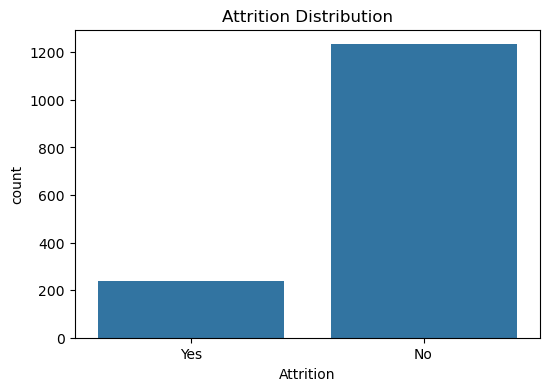

In [71]:
plt.figure(figsize=(6,4))
sb.countplot(x = 'Attrition', data = df)
plt.title("Attrition Distribution")
plt.show()

In [72]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [73]:
df_cleaned = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

In [74]:
df_cleaned.shape

(1470, 31)

<Axes: >

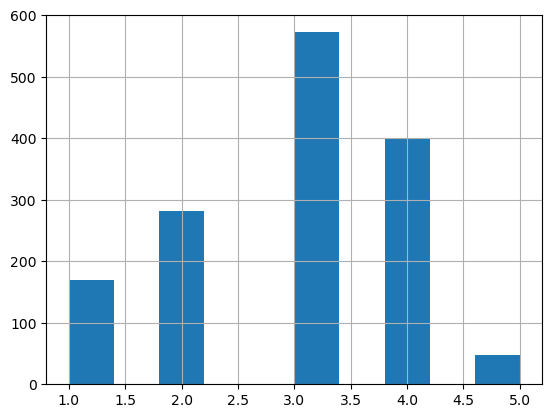

In [75]:
df_cleaned['Education'].hist()

In [76]:
df_corr = df_cleaned.copy()

In [77]:
df_corr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [78]:
attrition_map = {'Yes': 1, 'No': 0}
df_corr['Attrition'] = df_corr['Attrition'].map(attrition_map)

In [79]:
df_corr['Attrition'].unique()
df_corr['Attrition'].dtype

dtype('int64')

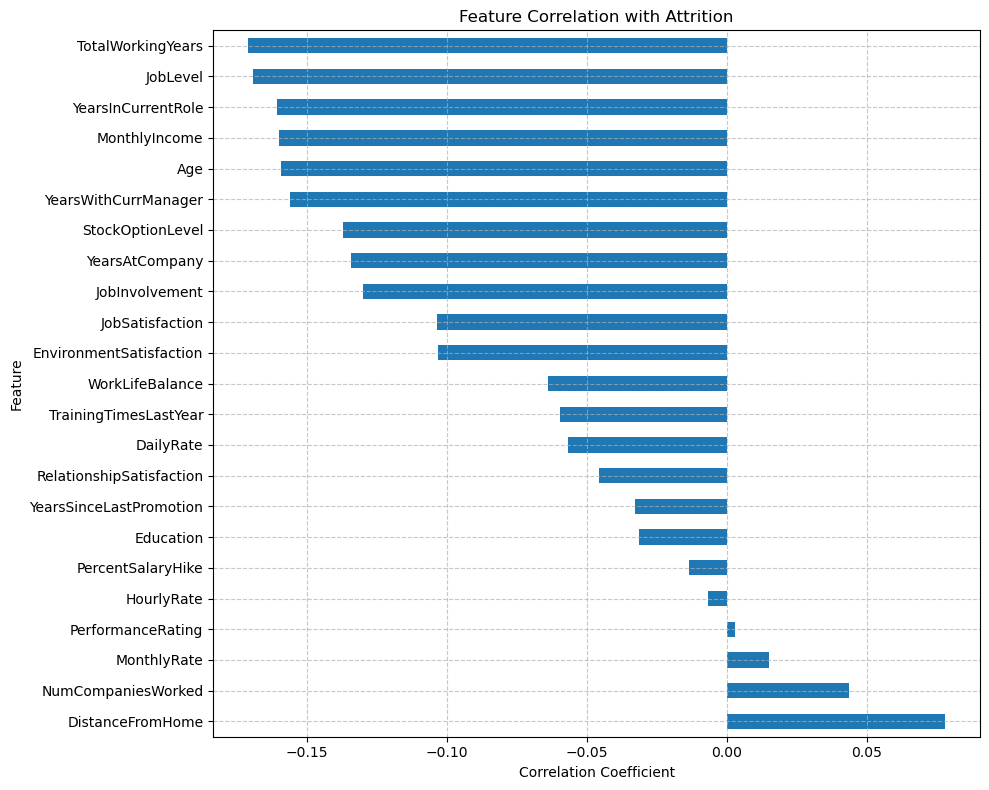

In [80]:
numeric_cols = df_corr.select_dtypes(include=np.number).columns
correlation_with_attrition = df_corr[numeric_cols].corr()['Attrition'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

correlation_with_attrition.drop('Attrition').plot(kind='barh')
plt.title('Feature Correlation with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [81]:
from joblib import load

In [ ]:
clean_data_cluster = pd.read_csv("../data/Emp-Attrition-Initial-Clean.csv")

clean_data_cluster = clean_data_cluster.drop(columns=['Attrition'])

model = load('./data/msmodel.pkl')

X = clean_data_cluster.iloc[:, 3:5].values


In [88]:
model.predict(X)

array([0, 1, 0, ..., 0, 0, 1], shape=(1470,))

In [ ]:
labels = model.labels_
labels_unique = np.unique(labels)
labels_unique

array([0, 1, 0, ..., 0, 0, 1], shape=(1470,))